### Imports

In [40]:
import os
from os import path, makedirs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load the beta-VAE module
import bvae_model as bvae
import spectrum_preprocessing as sp

### Load raw spectra

In [ ]:
#your path

path = "C:/Users/Zach/Documents/GitHub/betaVAE_Training/spectral_data/SMP65#010 21d 820um.csv"


In [42]:
filename = path.split("/")[-1]
filename

'SMP65#010 28d 820um.csv'

In [43]:
df = pd.read_csv(path, skiprows=[1,2])  # Skip metadata rows if present

if df.isnull().values.any():
    df = df.fillna(method='ffill').fillna(method='bfill')

print(f"Dataframe shape: {df.shape}")

Dataframe shape: (6144, 2100)


In [44]:
df

,map_x,map_y,Sample Name,1981.7 - 2095.8,3997.9328286151754,3996.348861567388,3994.7648945196006,3993.1809274718134,3991.5969604240263,3990.0129933762387,...,693.7775669308426,692.1935998830554,690.6096328352678,689.0256657874806,687.4416987396935,685.8577316919059,684.2737646441187,682.6897975963311,681.105830548544,679.5218635007568
0,40580.9,22588.8,28d 830um,3.46161,0.227467,0.227645,0.229460,0.231630,0.232955,0.233508,...,-0.261120,-0.466034,-0.722350,-0.674155,-0.687804,-0.407942,-0.202576,-0.178926,-0.268353,-0.266733
1,40586.3,22588.8,28d 830um,3.36010,0.208353,0.207963,0.206721,0.205727,0.205507,0.205313,...,-0.406395,-0.406683,-0.382275,-0.346707,-0.322685,-0.397002,-0.534879,-0.458919,-0.286732,-0.209742
2,40591.8,22588.8,28d 830um,3.46517,0.187906,0.187995,0.188453,0.187507,0.185841,0.186679,...,0.062814,0.004854,-0.130990,-0.155518,-0.010804,0.138976,0.203140,0.220366,0.181492,0.110511
3,40597.2,22588.8,28d 830um,3.35794,0.199804,0.202529,0.204876,0.205578,0.205932,0.207731,...,-0.276255,-0.183700,-0.133755,-0.106269,-0.206611,-0.166984,-0.169571,-0.246261,-0.353946,-0.487271
4,40602.6,22588.8,28d 830um,3.54871,0.230280,0.231017,0.231759,0.231216,0.230115,0.229762,...,-0.037483,-0.086507,-0.165180,-0.244290,-0.334536,-0.346675,-0.183601,-0.098280,-0.152702,-0.327600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,40901.5,23103.9,28d 830um,3.39412,0.214973,0.215165,0.217790,0.220937,0.222068,0.221066,...,-0.070965,-0.116803,-0.138069,-0.060378,0.088286,0.176357,0.091199,-0.077661,-0.173379,-0.202904
6140,40906.9,23103.9,28d 830um,3.44515,0.239708,0.240658,0.240709,0.240772,0.242212,0.244985,...,-0.097111,-0.155308,-0.229483,-0.174962,-0.065394,-0.106686,-0.235800,-0.399291,-0.508538,-0.301126
6141,40912.3,23103.9,28d 830um,3.50366,0.246152,0.242806,0.240588,0.241163,0.243430,0.245818,...,-0.473246,-0.361485,-0.304081,-0.350973,-0.392538,-0.360618,-0.352342,-0.385798,-0.382562,-0.380035
6142,40917.8,23103.9,28d 830um,3.44395,0.224593,0.225583,0.227008,0.229339,0.232833,0.236386,...,-0.197872,-0.159542,-0.223293,-0.385528,-0.471459,-0.310980,-0.113025,0.030822,0.077732,0.067074


# Sort the wavenumber columns and data and put in a dataframe
- necessary for input to pipeline below

In [45]:
wavenumber = df.columns.values[4:].astype(float)
wavenumber.sort()
wavenumber = wavenumber.astype(str)
spectra_df = df[wavenumber].copy()
np.dtype(spectra_df.columns.values.astype(float)[0])

dtype('float64')

### Run the pipeline
The `bvae.pipeline()` returns the interpolated wavenumber array; the interpolated absorbance array; the beta-model encodings L1 L2 and L3; the reconstruction MSE; and the reconstructed spectrum.

In [ ]:
L1_list=[]
L2_list=[]
L3_list=[]
MSE_list=[]
wavenumber_list=[]
absorbance_list=[]
reconstructed_list=[]
for i in range(spectra_df.shape[0]):    
    f = spectra_df.columns.values[:].astype('float32')
    a = spectra_df.iloc[i,:].values
    try:
        wavenumber, absorbance, encodings, mse, reconstructed = bvae.bvae_pipeline(f, a)
        L1 = encodings[0]
        L2 = encodings[1]
        L3 = encodings[2]
    except Exception as e:
        print(e)
        L1 = 0
        L2 = 0
        L3 = 0
        mse = 100
        reconstructed = np.zeros(len(wavenumber))
        
    L1_list.append(L1)
    L2_list.append(L2)
    L3_list.append(L3)
    MSE_list.append(mse)
    absorbance_list.append(absorbance)
    reconstructed_list.append(reconstructed)
    
    #print(encodings)
    #print(mse)


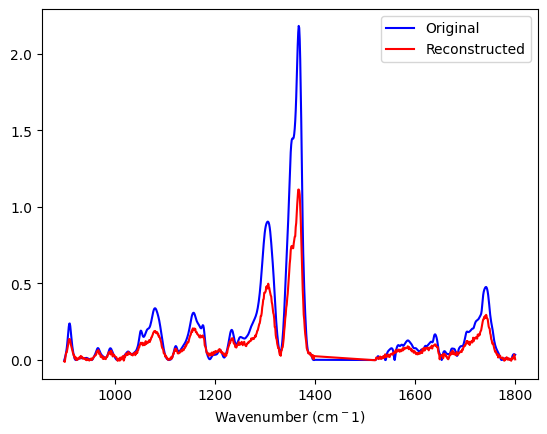

In [ ]:
plt.plot(wavenumber, absorbance, c='b')
plt.plot(wavenumber, reconstructed, c='r')
plt.legend(['Original','Reconstructed'])
plt.xlabel(f'Wavenumber (cm$^{-1}$)')
plt.show()

# Save results to dataframe

In [ ]:
hyperspectrum =pd.DataFrame(absorbance_list)
hyperspectrum.columns = wavenumber
hyperspectrum['map_x'] = df['map_x'].values
hyperspectrum['map_y'] = df['map_y'].values

Index([ 898.0,  899.0,  900.0,  901.0,  902.0,  903.0,  904.0,  905.0,  906.0,
        907.0,
       ...
       1791.0, 1792.0, 1793.0, 1794.0, 1795.0, 1796.0, 1797.0, 1798.0, 1799.0,
       1800.0],
      dtype='object', length=784)


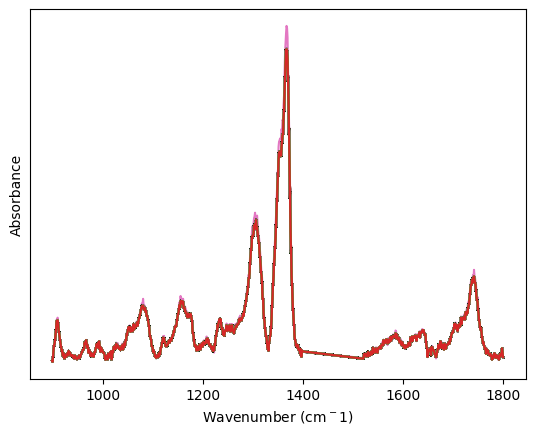

In [ ]:
reconstructed =pd.DataFrame(reconstructed_list)
reconstructed.columns = wavenumber
reconstructed['map_x'] = df['map_x'].values
reconstructed['map_y'] = df['map_y'].values

print(reconstructed.columns[:-2])
for i in range(len(reconstructed.iloc[:,:-2])):
    plt.plot(reconstructed.columns[:-2], reconstructed.iloc[i,:-2])


plt.xlabel(f'Wavenumber (cm$^{-1}$)')
plt.ylabel('Absorbance')
plt.yticks([])
plt.show()

In [ ]:
bvae_df =pd.DataFrame()
bvae_df['map_x'] = df['map_x'].values
bvae_df['map_y'] = df['map_y'].values
bvae_df['L1'] = L1_list
bvae_df['L2'] = L2_list
bvae_df['L3'] = L3_list
bvae_df['MSE'] = MSE_list

# Save to csv files for viewing in Quasar

In [ ]:

path_to_save = 'C:/Users/Zach/Documents/BVAE_processed/'
makedirs(path_to_save, exist_ok=True)
bvae_df.to_csv(path_to_save +'bvae_'+filename)

In [ ]:
path_to_save = "C:/Users/Zach/Documents/Hyperspectra/"
makedirs(path_to_save, exist_ok=True)
file=path.join(path_to_save + 'hyperspectrum_'+filename)
hyperspectrum.to_csv(file, index=False)

OSError: Cannot save file into a non-existent directory: 'CC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv:C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv\C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvUC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvsC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csveC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvrC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvsC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv\C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvZC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvaC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvcC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvhC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv\C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvDC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvoC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvcC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvuC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvmC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csveC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvnC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvtC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvsC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv\C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvHC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvyC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvpC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csveC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvrC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvsC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvpC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csveC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvcC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvtC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvrC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvaC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv\C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvhC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvyC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvpC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csveC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvrC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvsC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvpC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csveC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvcC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvtC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvrC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvuC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvmC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv_C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvSC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvMC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvPC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv6C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv5C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv#C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv0C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv1C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv0C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv2C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv8C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvdC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv8C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv2C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv0C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvuC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvmC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csv.C:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvcC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data\SMP65#010 28d 820um.csvsC:\Users\Zach\Documents\GitHub\betaVAE_Training\training_data'

In [ ]:
path_to_save = "C:/Users/Zach/Documents/Reconstructions/"
makedirs(path_to_save, exist_ok=True)
reconstructed.to_csv(path_to_save +'reconstructed_'+filename, index=False)